In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

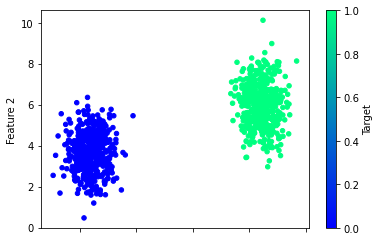

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.5904 - accuracy: 0.7253
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7613
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.7707
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7813
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7867
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7960
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.8107
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5262 - accuracy: 0.8120
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.8200
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.8293
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9947
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9947
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.9960
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9973
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9973
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.9973
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9973
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9973
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9987
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

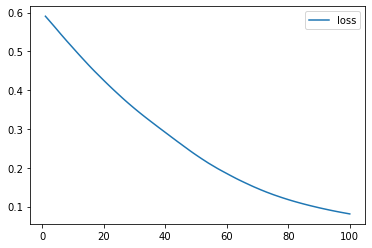

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

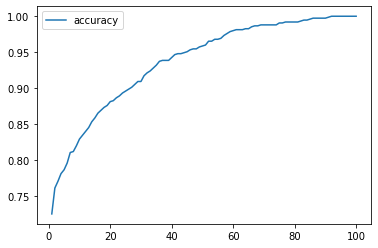

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0746 - accuracy: 1.0000 - 203ms/epoch - 25ms/step
Loss: 0.07456740736961365, Accuracy: 1.0


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 231ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## Non Linear Neural Test Network

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

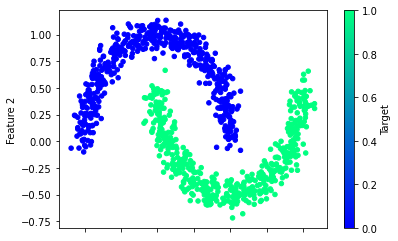

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 1.3489 - accuracy: 0.3840
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1446 - accuracy: 0.4200
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0172 - accuracy: 0.4533
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9360 - accuracy: 0.4760
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8782 - accuracy: 0.4960
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8329 - accuracy: 0.5267
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7961 - accuracy: 0.5453
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7654 - accuracy: 0.5653
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.5800
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7158 - accuracy: 0.5933
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 7ms/step - loss: 0.2832 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2824 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2816 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2787 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.8933
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.8933
Epoch 93/100


<AxesSubplot:>

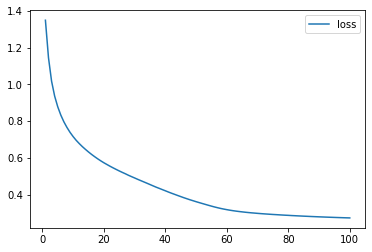

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

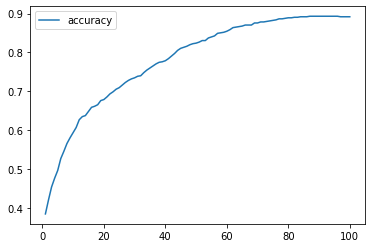

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.5886 - accuracy: 0.7000
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.7800
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.8107
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.8187
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.8280
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8333
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8413
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8480
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8507
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8560
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.1718 - accuracy: 0.9333
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.9333
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.9333
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1670 - accuracy: 0.9333
Epoch 87/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.9333
Epoch 88/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9347
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9373
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1606 - accuracy: 0.9387
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9387
Epoch 92/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1574 - accuracy: 0.9387
Epoch 93/100
